In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargar el conjunto de datos

In [79]:
df = pd.read_csv('AccidentesAviones.csv')

Vemos las primeras filas del DataFrame

In [80]:
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Eliminamos la columna 'Unnamed: 0'

In [81]:
df = df.drop(('Unnamed: 0'), axis=1)

In [82]:
df.columns

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Reemplazamos los valores '?' por Nan para poder contabilizar los valores faltantes y trabajarlos de forma mas efectiva

In [83]:
df.replace('?', np.nan, inplace=True)

Vemos los Dtypes de las columnas y contamos sus datos faltantes

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          3504 non-null   object
 2   Ruta                    5003 non-null   object
 3   OperadOR                4998 non-null   object
 4   flight_no               1326 non-null   object
 5   route                   4245 non-null   object
 6   ac_type                 4995 non-null   object
 7   registration            4736 non-null   object
 8   cn_ln                   4341 non-null   object
 9   all_aboard              4991 non-null   object
 10  PASAJEROS A BORDO       4787 non-null   object
 11  crew_aboard             4789 non-null   object
 12  cantidad de fallecidos  5000 non-null   object
 13  passenger_fatalities    4773 non-null   object
 14  crew_fatalities         4773 non-null   object
 15  grou

In [86]:
df.isnull().sum()

fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

Modificamos el tipo de dato de la columna 'fecha' para que sea 'Datetime'

In [87]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y')

Estadísticas descriptivas

In [88]:
df.describe()

,fecha
count,5008
mean,1971-05-14 09:57:13.226837072
min,1908-09-17 00:00:00
25%,1951-05-07 12:00:00
50%,1970-09-02 12:00:00
75%,1992-03-22 12:00:00
max,2021-07-06 00:00:00


Identificar y eliminar registros duplicados

In [89]:
df.drop_duplicates(inplace=True)

Realizamos un grafico de barras para ver la cantidad de accidentes aereos que hubo año tras año

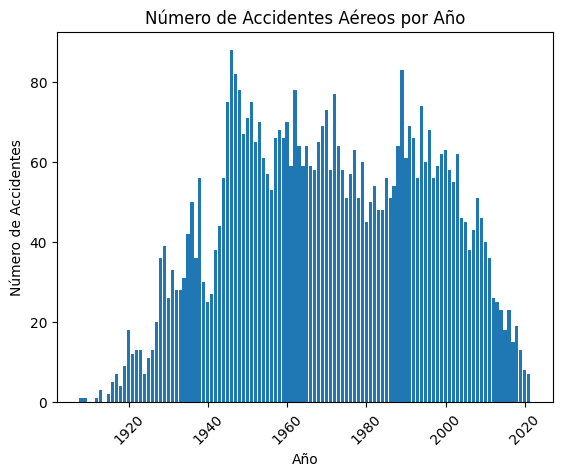

In [90]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y')
df['año'] = df['fecha'].dt.year
accidentes_por_año = df['año'].value_counts().sort_index()

plt.bar(accidentes_por_año.index, accidentes_por_año.values)
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Número de Accidentes Aéreos por Año')
plt.xticks(rotation=45)
plt.show()

Se puede ver claramente como a comienzos del siglo XX los accidentes eran muy pocos, esto principalmente a la poca cantidad de vuelos que había en esa época. A medida que fueron avanzando los años la cantidad de vuelos se incrementó, y asi tambien la cantidad de accidentes,  alcanzando grandes numeros entre 1945 y 1990. A partir de ahi la cantidad de accidetes fue disminuyendo, esto no en concecuencia de menos cantidad de viajes aereos, sino probablemente al avance de la tecnología y la mejora siginificativa en niveles de seguridad de los aviones.

Realizamos un grafico de barras para ver que porcentaje de fallecidos sobre la cantidad de personas a bordo hubo año por año. Luego realizamos un grafico de pastel para ver el porcentaje de fallecidos total

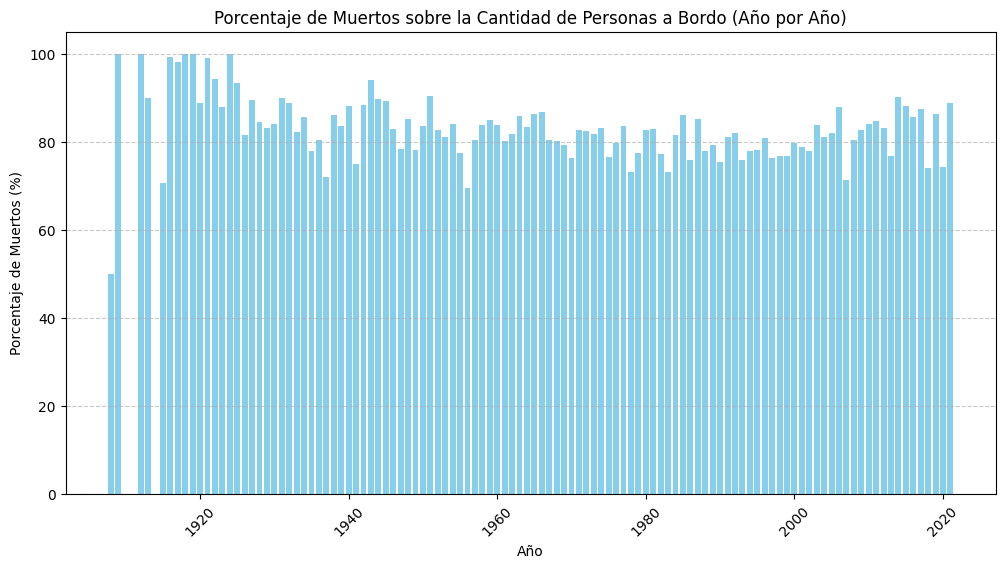

In [102]:
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')
df['all_aboard'] = pd.to_numeric(df['all_aboard'], errors='coerce')
# Calculamos el porcentaje de muertos sobre la cantidad de personas a bordo.
df['porcentaje_muertos'] = (df['cantidad de fallecidos'] / df['all_aboard']) * 100

# Agrupamos los datos por año y calculamos el promedio del porcentaje de muertos por año.
porcentaje_muertos_por_año = df.groupby(df['fecha'].dt.year)['porcentaje_muertos'].mean()

# Creamos el gráfico de barras.
plt.figure(figsize=(12, 6))
plt.bar(porcentaje_muertos_por_año.index, porcentaje_muertos_por_año.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Muertos (%)')
plt.title('Porcentaje de Muertos sobre la Cantidad de Personas a Bordo (Año por Año)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

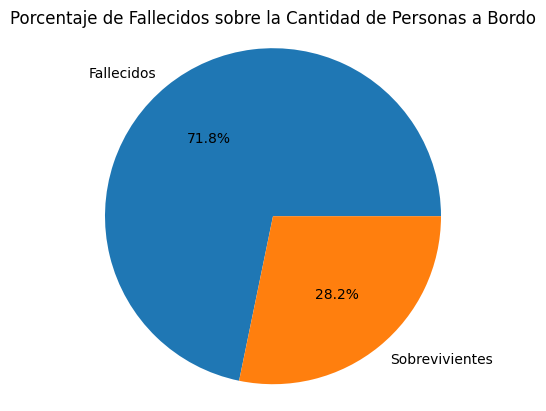

In [92]:
# Calculmos el total de personas a bordo y el total de fallecidos
total_personas_a_bordo = df['all_aboard'].sum()
total_fallecidos = df['cantidad de fallecidos'].sum()

# Calculmos el porcentaje de muertos sobre la cantidad de personas a bordo
porcentaje_muertos = (total_fallecidos / total_personas_a_bordo) * 100

# Creamos una lista con los valores para el gráfico de pastel
valores = [porcentaje_muertos, 100 - porcentaje_muertos]
etiquetas = ['Fallecidos', 'Sobrevivientes']

# Creamos el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Porcentaje de Fallecidos sobre la Cantidad de Personas a Bordo')
plt.axis('equal')  # Hacemos que el gráfico de pastel sea circular

plt.show()

En el grafico de barras podemos ver como claramente el porcentaje de fallecidos se mantiene similar a lo largo de los años, salvo a principios del siglo, pero esto debidoa que en esa epoca se realizaban mayoritariamente vuelos de pocos tripulantes. Teniendo en cuenta los graficos anteriores podemos deducir que el avance de la tecnologia en los aviones a ayudado a disminuir la cantidad de accidentes, mas no la cantidad de fallecidos. 

Ahora realizamos los mismos dos graficos pero haciendo la diferenciacion de los pasajeros con el personal a bordo. Esto con el objetivo de ver si podemos encontrar alguna variacion en el porcentaje de fallecidos

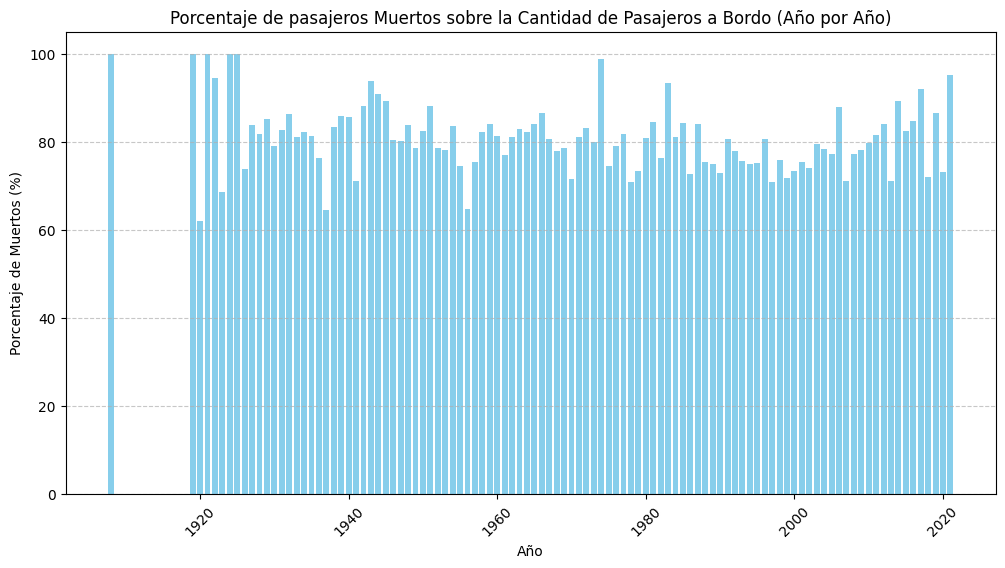

In [103]:
df['passenger_fatalities'] = pd.to_numeric(df['passenger_fatalities'], errors='coerce')
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')
# Calculamos el porcentaje de muertos sobre la cantidad de personas a bordo.
df['porcentaje_muertos'] = (df['passenger_fatalities'] / df['PASAJEROS A BORDO']) * 100

# Agrupamos  los datos por año y calculamos  el promedio del porcentaje de muertos por año.
porcentaje_muertos_por_año = df.groupby(df['fecha'].dt.year)['porcentaje_muertos'].mean()

# Creamos  el gráfico de barras.
plt.figure(figsize=(12, 6))
plt.bar(porcentaje_muertos_por_año.index, porcentaje_muertos_por_año.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Muertos (%)')
plt.title('Porcentaje de pasajeros Muertos sobre la Cantidad de Pasajeros a Bordo (Año por Año)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

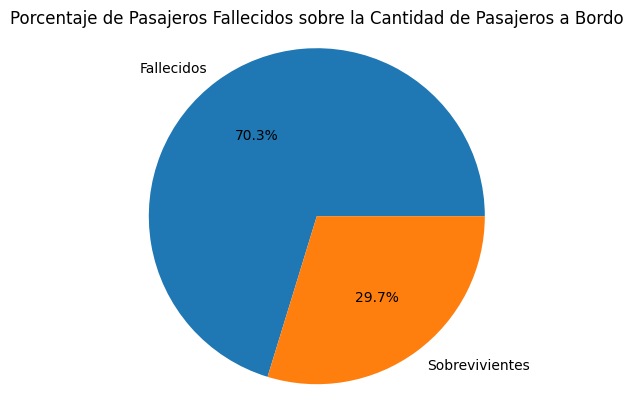

In [104]:
# Calculamos  el total de personas a bordo y el total de fallecidos
total_personas_a_bordo = df['PASAJEROS A BORDO'].sum()
total_fallecidos = df['passenger_fatalities'].sum()

# Calculamos  el porcentaje de muertos sobre la cantidad de personas a bordo
porcentaje_muertos = (total_fallecidos / total_personas_a_bordo) * 100

# Creamos  una lista con los valores para el gráfico de pastel
valores = [porcentaje_muertos, 100 - porcentaje_muertos]
etiquetas = ['Fallecidos', 'Sobrevivientes']

# Creamos  el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Porcentaje de Pasajeros Fallecidos sobre la Cantidad de Pasajeros a Bordo')
plt.axis('equal')  # Hacemos  que el gráfico de pastel sea circular

plt.show()

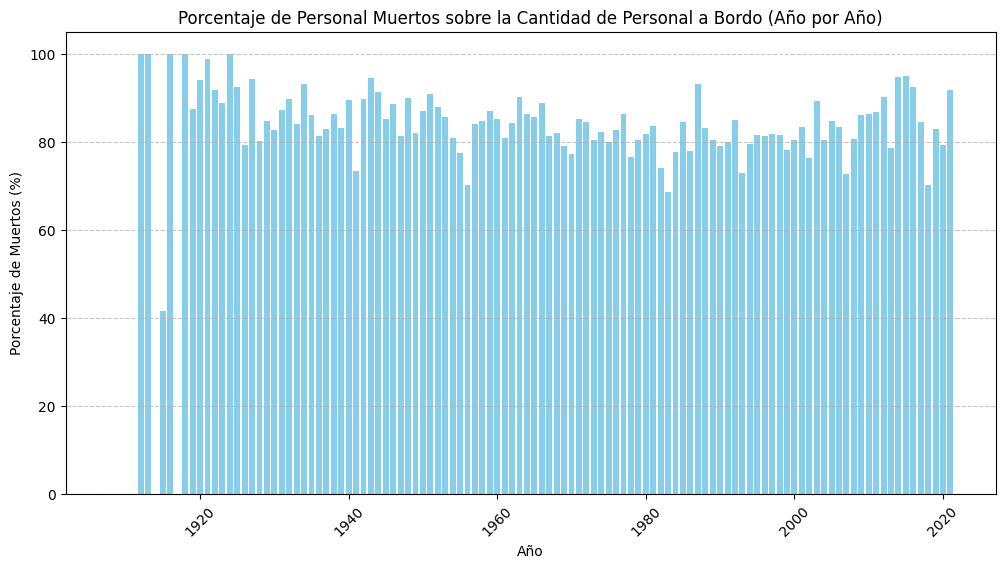

In [105]:
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')
# Calculamos  el porcentaje de muertos sobre la cantidad de personas a bordo.
df['porcentaje_muertos'] = (df['crew_fatalities'] / df['crew_aboard']) * 100

# Agrupamos  los datos por año y calculamos  el promedio del porcentaje de muertos por año.
porcentaje_muertos_por_año = df.groupby(df['fecha'].dt.year)['porcentaje_muertos'].mean()

# Creamos  el gráfico de barras.
plt.figure(figsize=(12, 6))
plt.bar(porcentaje_muertos_por_año.index, porcentaje_muertos_por_año.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Muertos (%)')
plt.title('Porcentaje de Personal Muertos sobre la Cantidad de Personal a Bordo (Año por Año)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

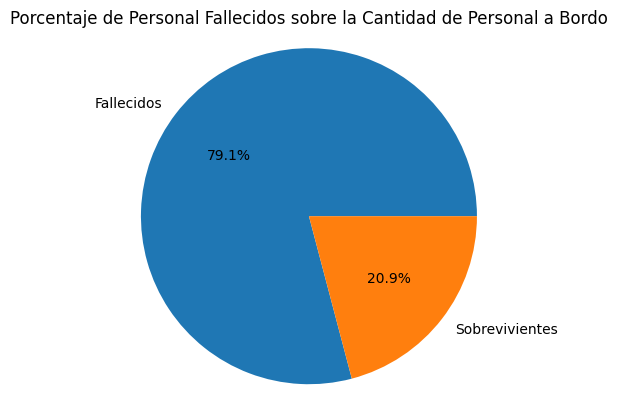

In [106]:
# Calculamos  el total de personas a bordo y el total de fallecidos
total_personas_a_bordo = df['crew_aboard'].sum()
total_fallecidos = df['crew_fatalities'].sum()

# Calculamos  el porcentaje de muertos sobre la cantidad de personas a bordo
porcentaje_muertos = (total_fallecidos / total_personas_a_bordo) * 100

# Creamos  una lista con los valores para el gráfico de pastel
valores = [porcentaje_muertos, 100 - porcentaje_muertos]
etiquetas = ['Fallecidos', 'Sobrevivientes']

# Creamos  el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Porcentaje de Personal Fallecidos sobre la Cantidad de Personal a Bordo')
plt.axis('equal')  # Hacemos que el gráfico de pastel sea circular

plt.show()

Luego de analizar los graficos podemos ver como el porcentaje de fallecidos del personal a bordo es casi un 10% mas que el de los pasajeros. Esto se podria significar que hay zonas del avion mas seguras que otras. Probablemente la zona delantera del avión tenga el riesgo mas alto de muerte que las zonas traseras.

Ahora realizaremos graficos de barras para encontrar el top 10 de los operadores, aviones, rutas y tipo de vuelos con mas accidentes

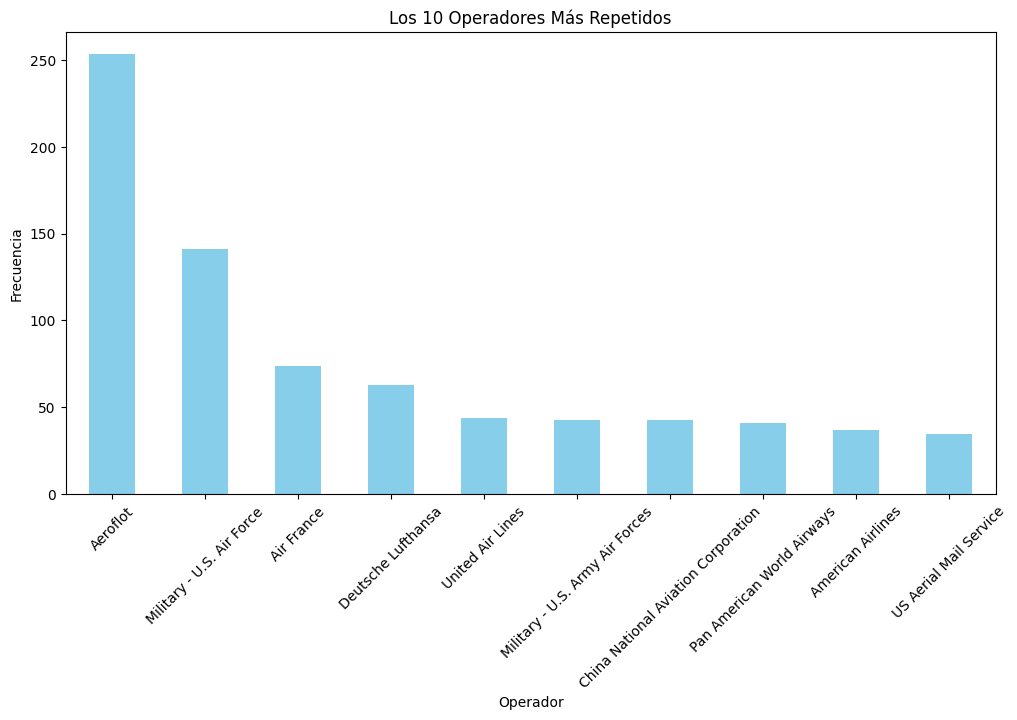

In [111]:
operadores_mas_repitentes = df['OperadOR'].value_counts().head(10)  # Obténemos los 10 operadores más repetidos

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
operadores_mas_repitentes.plot(kind='bar', color='skyblue')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.title('Los 10 Operadores Más Repetidos')
plt.xticks(rotation=45)
plt.show()

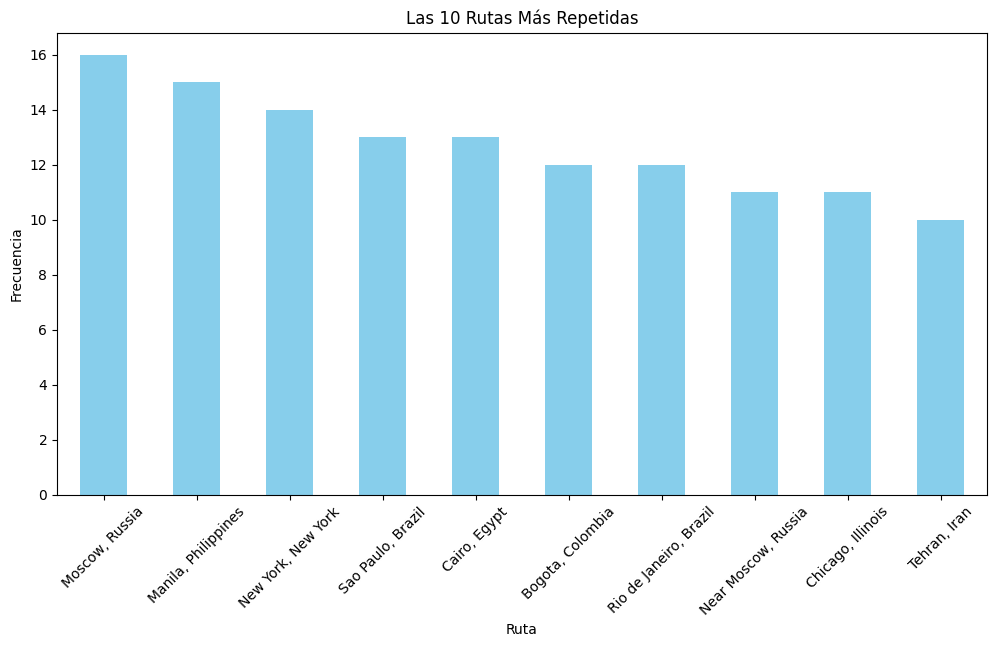

In [107]:
operadores_mas_repitentes = df['Ruta'].value_counts().head(10)  # Obtenemos las 10 Rutas más repetidas

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
operadores_mas_repitentes.plot(kind='bar', color='skyblue')
plt.xlabel('Ruta')
plt.ylabel('Frecuencia')
plt.title('Las 10 Rutas Más Repetidas')
plt.xticks(rotation=45)
plt.show()

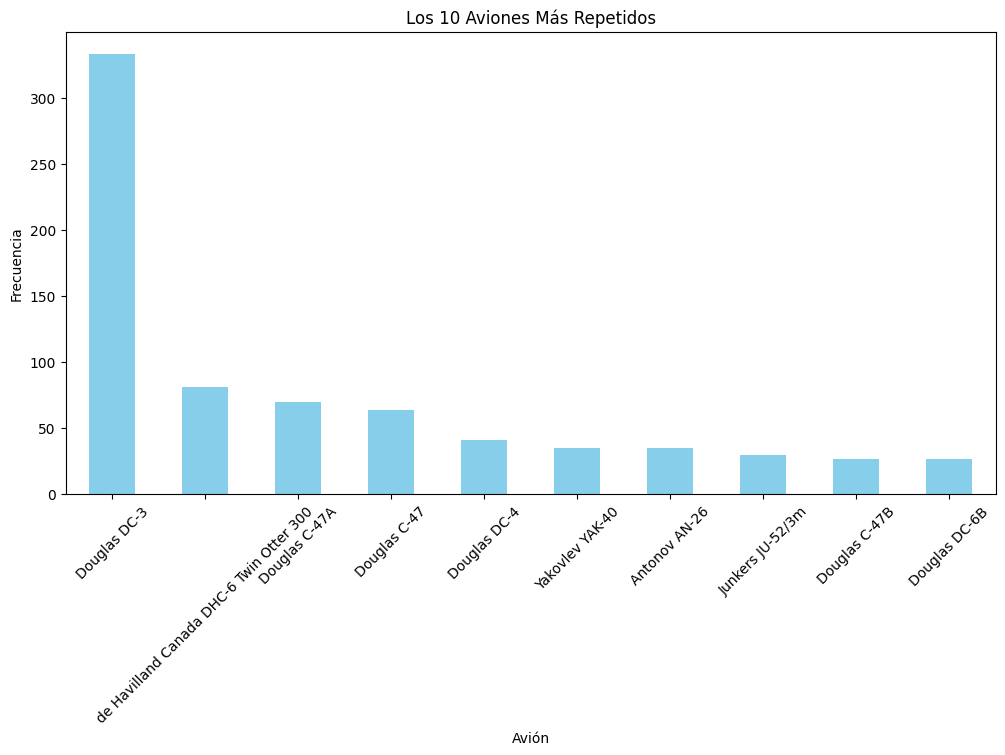

In [108]:
operadores_mas_repitentes = df['ac_type'].value_counts().head(10)  # Obtenemos los 10 aviones más repetidos

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
operadores_mas_repitentes.plot(kind='bar', color='skyblue')
plt.xlabel('Avión')
plt.ylabel('Frecuencia')
plt.title('Los 10 Aviones Más Repetidos')
plt.xticks(rotation=45)
plt.show()

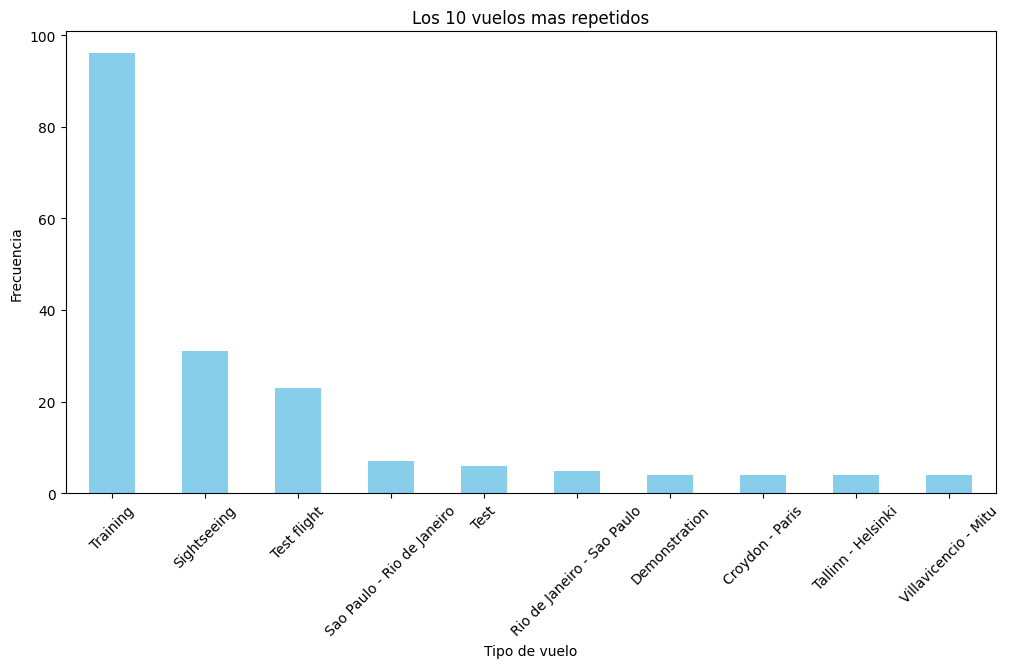

In [109]:
operadores_mas_repitentes = df['route'].value_counts().head(10)  # Obtenemos los 10 vuelos mas repetidos

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
operadores_mas_repitentes.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Frecuencia')
plt.title('Los 10 vuelos mas repetidos')
plt.xticks(rotation=45)
plt.show()

Lo primero que vemos es que la operadora que mas accidentes tuvo fue Aeroflot, una empresa rusa. Esto tambien se ve reflejado en el grafico de las Rutas en donde Rusia aparece 2 veces dentro del top 10. Lo segundo que podemos notar es la clara diferencia de fecuencia de accidentes del avion 'douglas dc-3' con respecto a los demas. Esta frecuencia de accidentes va de la mano con el grafico visto anteriormente de la cantidad de accidentes año por año ya que el mismo fue producido principalmente entre las decadas del 30 y 50 del siglo XX, espoca donde se noto el mayor aumento en cantidad de accidentea aereos.
Por ultimo podemos ver que la mayoria de los accidentes ocurren durante vuelos de entrenamiento. Estos pueden surgir debido a la falta de experiencia de los pilotos. 